In [3]:
# import all the libraies needed
%matplotlib inline
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

init_notebook_mode(connected=True)

# Process the data files

### Load all the data files into dataframes

In [4]:
### Set Path and load all the files
path = r'C:/Users/Albert/Desktop/Healthcare'

#read data files for year 2017
print("reading data for year 2017")
BenCS2017=pd.read_csv(path+'/2017/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2017=pd.read_csv(path+'/2017/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Quality2017=pd.read_csv(path+'/2017/Quality_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

#read data files for year 2016
print("reading data for year 2016")
BenCS2016=pd.read_csv(path+'/2016/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2016=pd.read_csv(path+'/2016/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

#read data files for year 2015
print("reading data for year 2015")
BenCS2015=pd.read_csv(path+'/2015/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2015=pd.read_csv(path+'/2015/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

print ("done!")

reading data for year 2017
reading data for year 2016
reading data for year 2015
done!


### Describe data files and check for missing data

In [ ]:
BenCS2017.describe()

In [ ]:
Rate2017.describe()

In [17]:
#check for missing value in Benefits_Cost_Sharing 2017 data
total = BenCS2017.isnull().sum().sort_values(ascending = True)
percent = (BenCS2017.isnull().sum()/BenCS2017.isnull().count()).sort_values(ascending = True)
missing_BenCS2017  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_BenCS2017

,Total,Percent
BusinessYear,0,0.000000
StateCode,0,0.000000
IssuerId,0,0.000000
SourceName,0,0.000000
ImportDate,0,0.000000
StandardComponentId,0,0.000000
PlanId,0,0.000000
BenefitName,0,0.000000
IsCovered,46458,0.035082
IsExclFromOonMOOP,206513,0.155944


In [16]:
#check for missing value in Rate_PUF 2017 data
total = Rate2017.isnull().sum().sort_values(ascending = True)
percent = (Rate2017.isnull().sum()/Rate2017.isnull().count()).sort_values(ascending = True)
missing_Rate2017  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_Rate2017

,Total,Percent
BusinessYear,0,0.000000
IndividualRate,0,0.000000
Age,0,0.000000
RatingAreaId,0,0.000000
PlanId,0,0.000000
RateExpirationDate,0,0.000000
Tobacco,0,0.000000
FederalTIN,0,0.000000
ImportDate,0,0.000000
SourceName,0,0.000000


# National level exploration

### Find the number of issurers/plans in each state

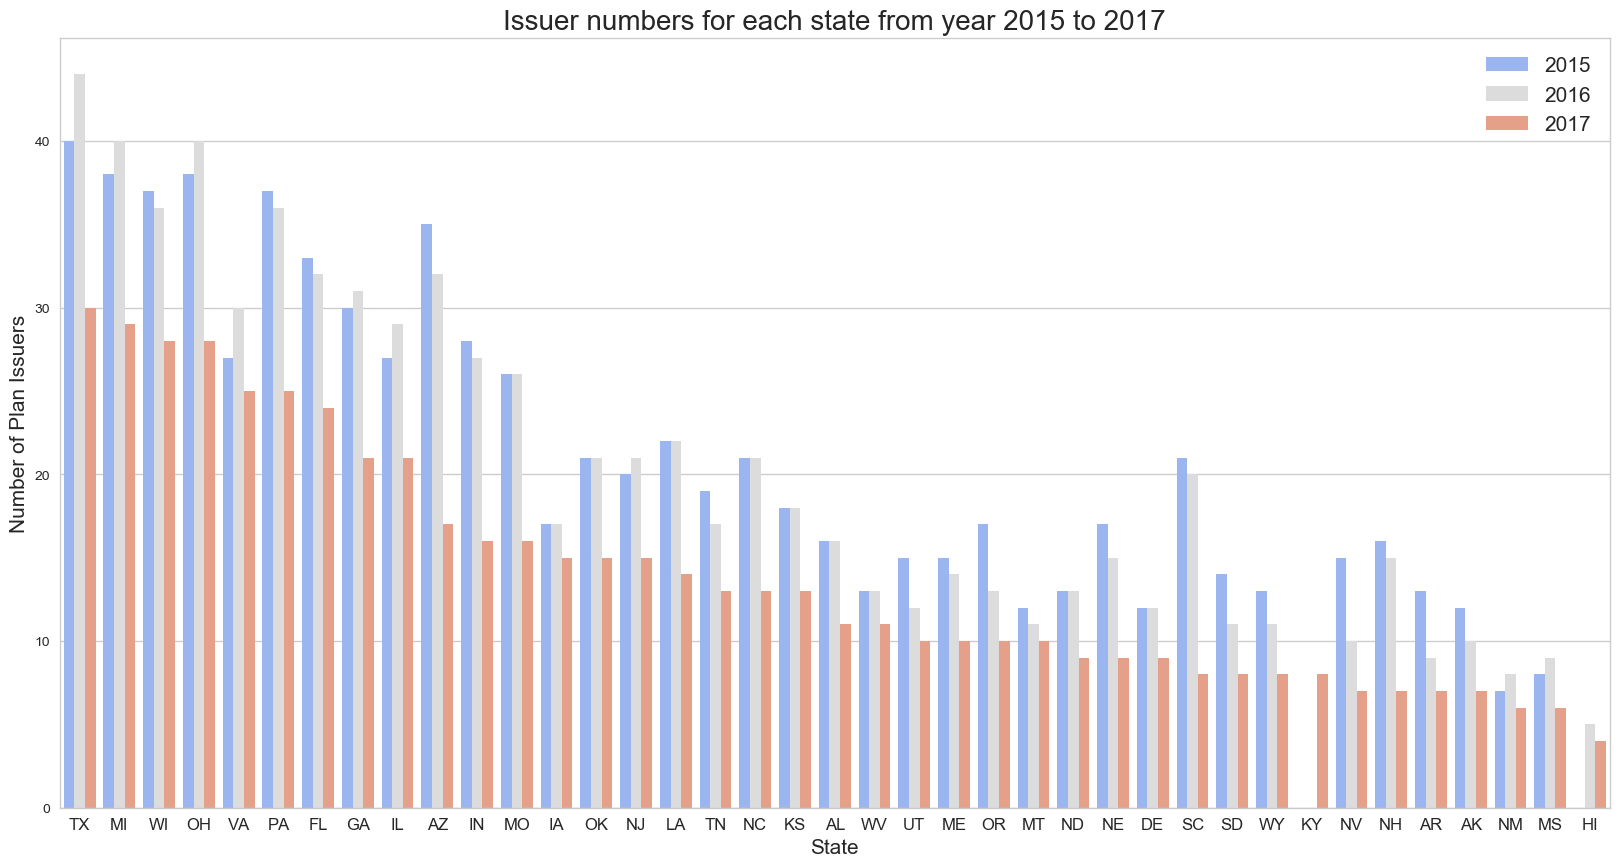

In [373]:
# number of issurers in each state from year 2015-2017
df_2017=BenCS2017[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]
df_2016=BenCS2016[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]
df_2015=BenCS2015[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]

IssuerCt_2017=df_2017.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2017["year"]=2017
IssuerCt_2016=df_2016.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2016["year"]=2016
IssuerCt_2015=df_2015.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2015["year"]=2015

IssuerCt_cbd=pd.concat([IssuerCt_2017,IssuerCt_2016,IssuerCt_2015], ignore_index=True).fillna(0)
#print(IssuerCt_combined)

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title('Issuer numbers for each state from year 2015 to 2017',fontsize=20)
ax = sns.barplot(x="StateCode", y='IssuerId', hue="year", data=IssuerCt_cbd,palette='coolwarm')
plt.legend(loc='upper right',fontsize=15)
ax.set_xticklabels(IssuerCt_cbd.StateCode,rotation=0, fontsize=12)
#ax.set_yticklabels(IssuerCt_cbd.IssuerId,rotation=0, fontsize=12)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Number of Plan Issuers',fontsize=15)
plt.show()

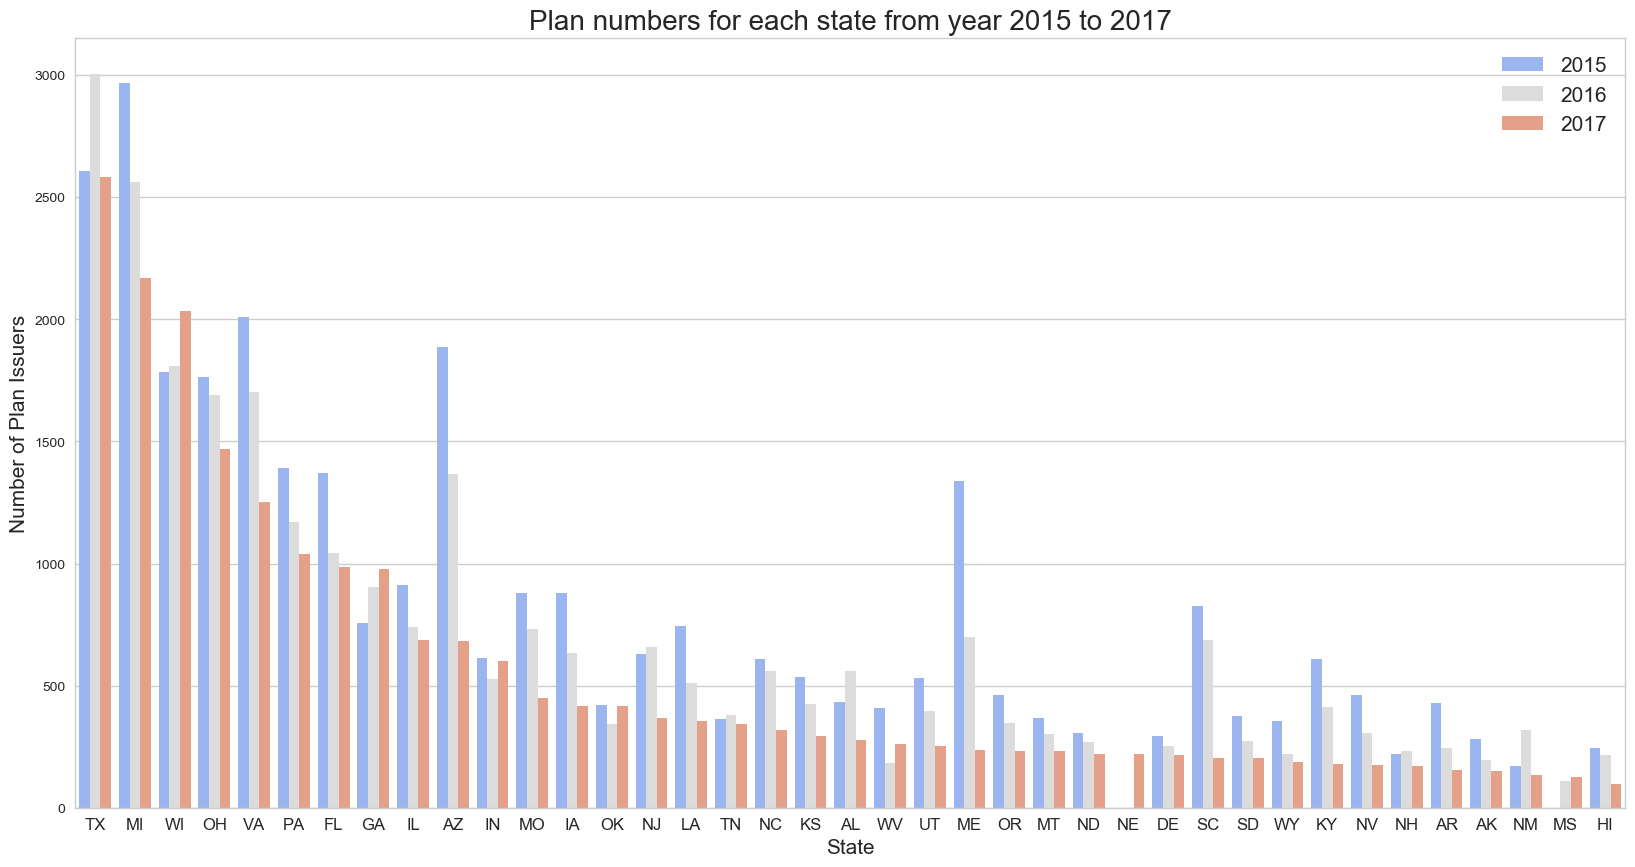

In [374]:
# number of plans in each state from year 2015-2017
PlanCt_2017=df_2017.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2017["year"]=2017
PlanCt_2016=df_2016.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2016["year"]=2016
PlanCt_2015=df_2015.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2015["year"]=2015

PlanCt_cbd=pd.concat([PlanCt_2017,PlanCt_2016,PlanCt_2015], ignore_index=True).fillna(0)
#print(IssuerCt_combined)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title('Plan numbers for each state from year 2015 to 2017',fontsize=20)
ax = sns.barplot(x="StateCode", y='PlanId', hue="year", data=PlanCt_cbd,palette='coolwarm')
plt.legend(loc='upper right',fontsize=15)
ax.set_xticklabels(IssuerCt_combined.StateCode,rotation=0, fontsize=12)
#ax.set_yticklabels(IssuerCt_combined.IssuerId,rotation=0, fontsize=12)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Number of Plan Issuers',fontsize=15)
plt.show()

# State Level Exploration

### Find the distrubution of plans in each state based on how many EHB (essential health benifits) is covered

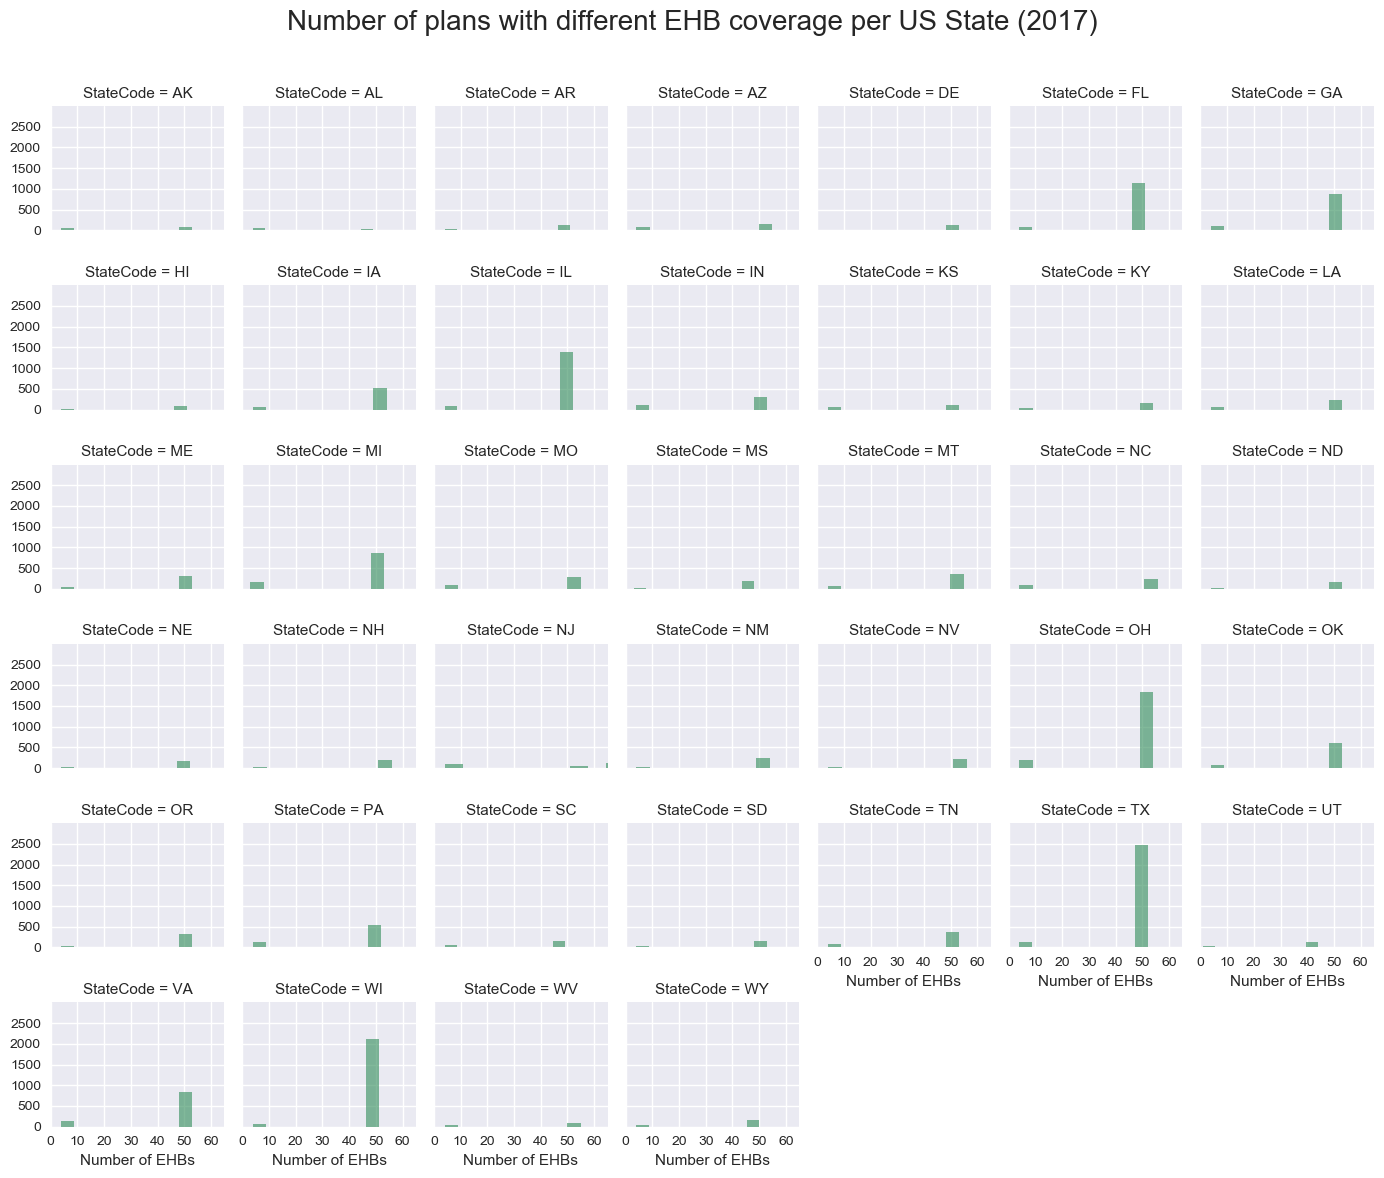

In [375]:
df=df_2017[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2,sharex=True, sharey=True)
grid.map(plt.hist,'Number of EHBs',color="seagreen",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2017)',fontsize=20) 
plt.show()

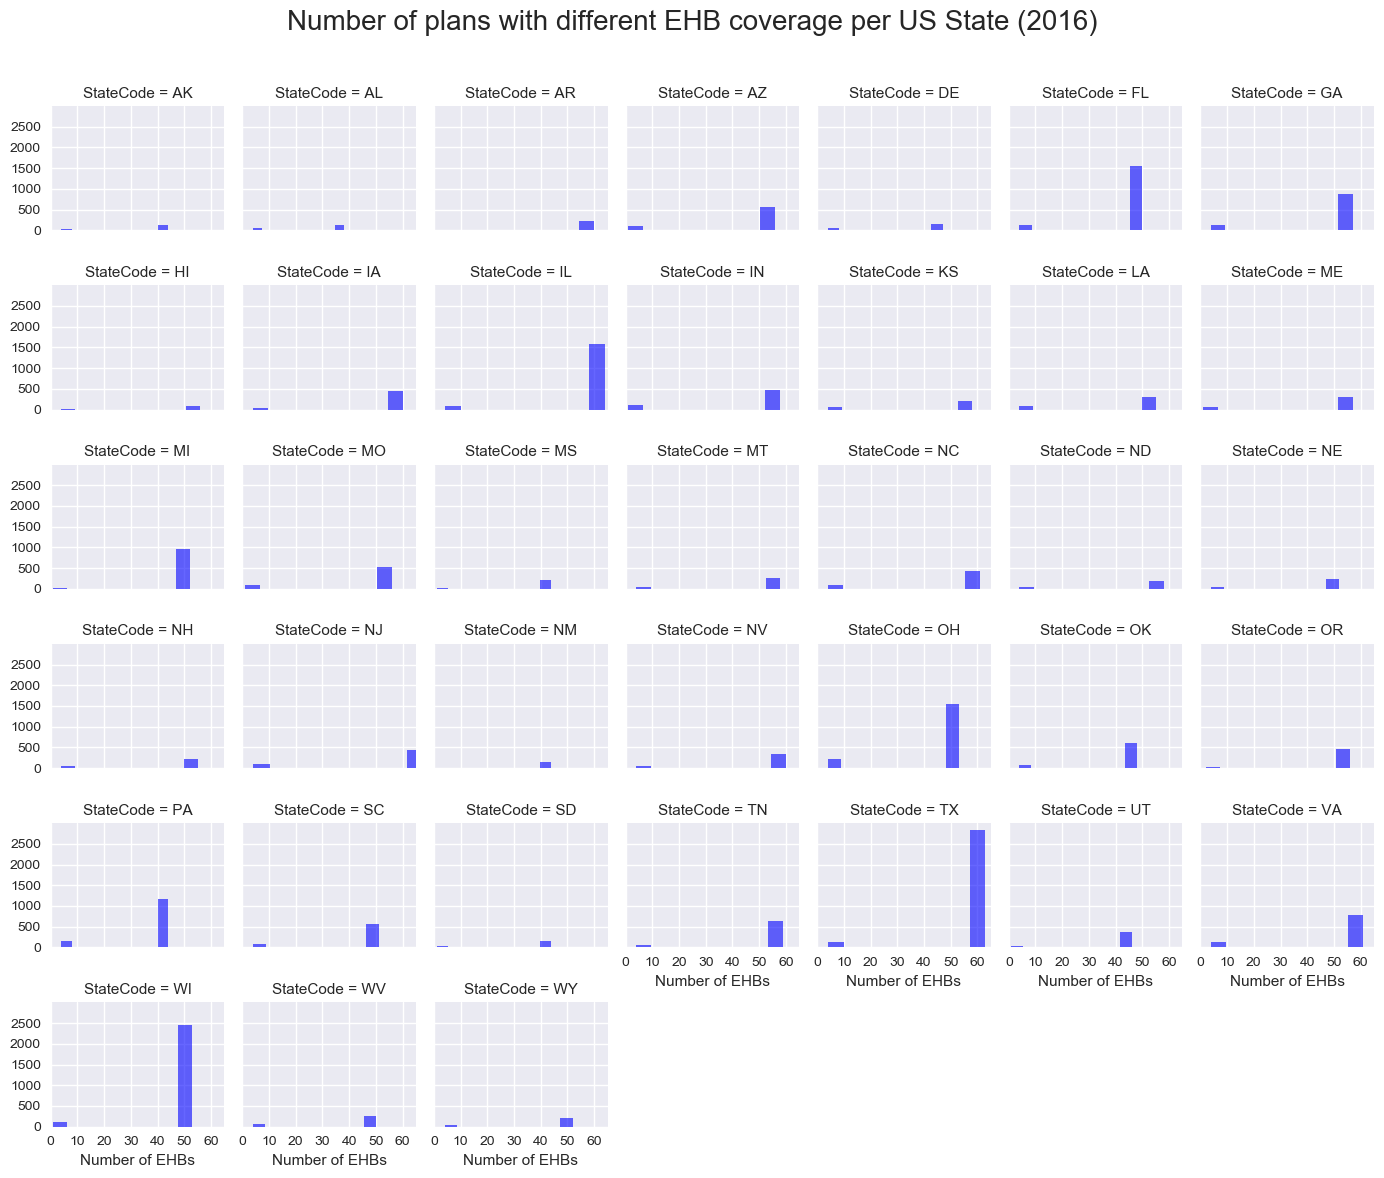

In [377]:
df=df_2016[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2)
grid.map(plt.hist,'Number of EHBs',color="b",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2016)',fontsize=20) 
plt.show()

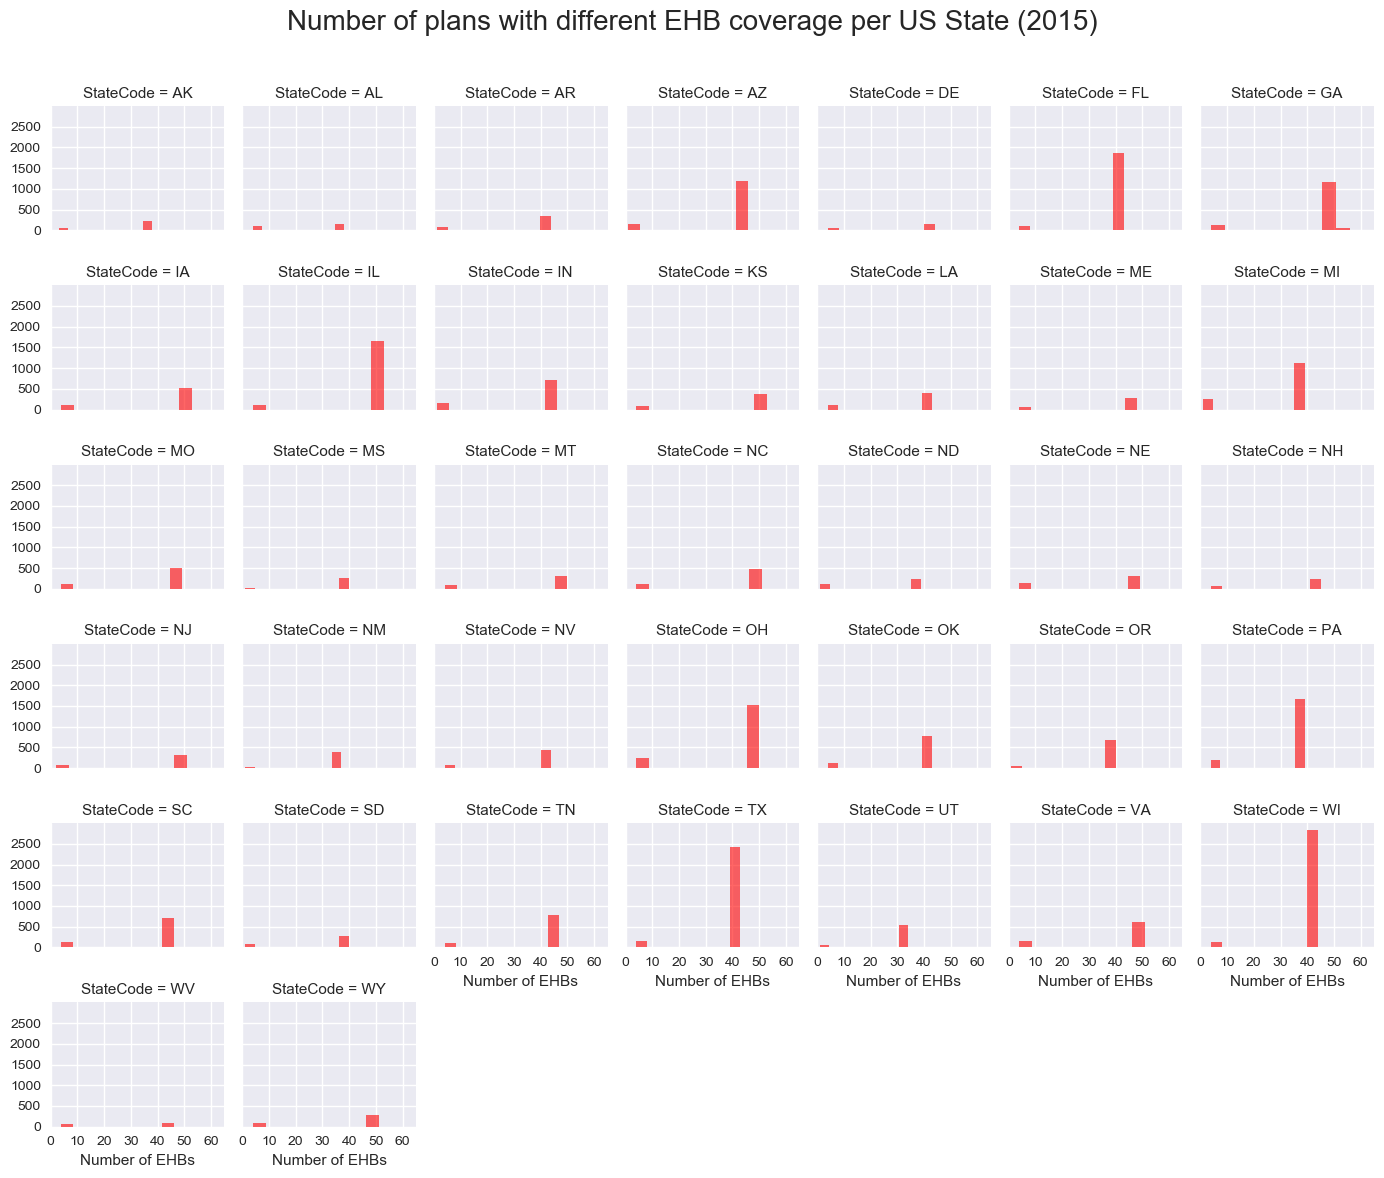

In [378]:
df=df_2015[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2)
grid.map(plt.hist,'Number of EHBs',color="r",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2015)',fontsize=20) 
plt.show()

### Don't Age

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

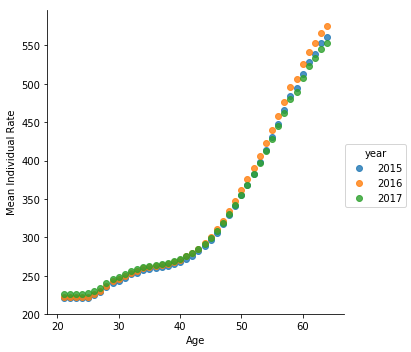

In [10]:
df1=Rate2017[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df1['IndividualRate']=pd.to_numeric(df1['IndividualRate'])
df1["Age"]=pd.to_numeric(df1["Age"],errors='coerce')
df1_age=df1.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df1_age['year']=2017

df2=Rate2016[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df2['IndividualRate']=pd.to_numeric(df2['IndividualRate'])
df2["Age"]=pd.to_numeric(df2["Age"],errors='coerce')
df2_age=df2.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df2_age['year']=2016

df3=Rate2015[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df3['IndividualRate']=pd.to_numeric(df3['IndividualRate'])
df3["Age"]=pd.to_numeric(df3["Age"],errors='coerce')
df3_age=df3.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df3_age['year']=2015

age_cbd=pd.concat([df1_age,df2_age,df3_age], ignore_index=True)
age_cbd=age_cbd.set_index("Age").rename(columns={'mean': 'Mean Individual Rate'}).reset_index()

sns.lmplot(x='Age', y='Mean Individual Rate',data=age_cbd,hue='year',fit_reg=False)

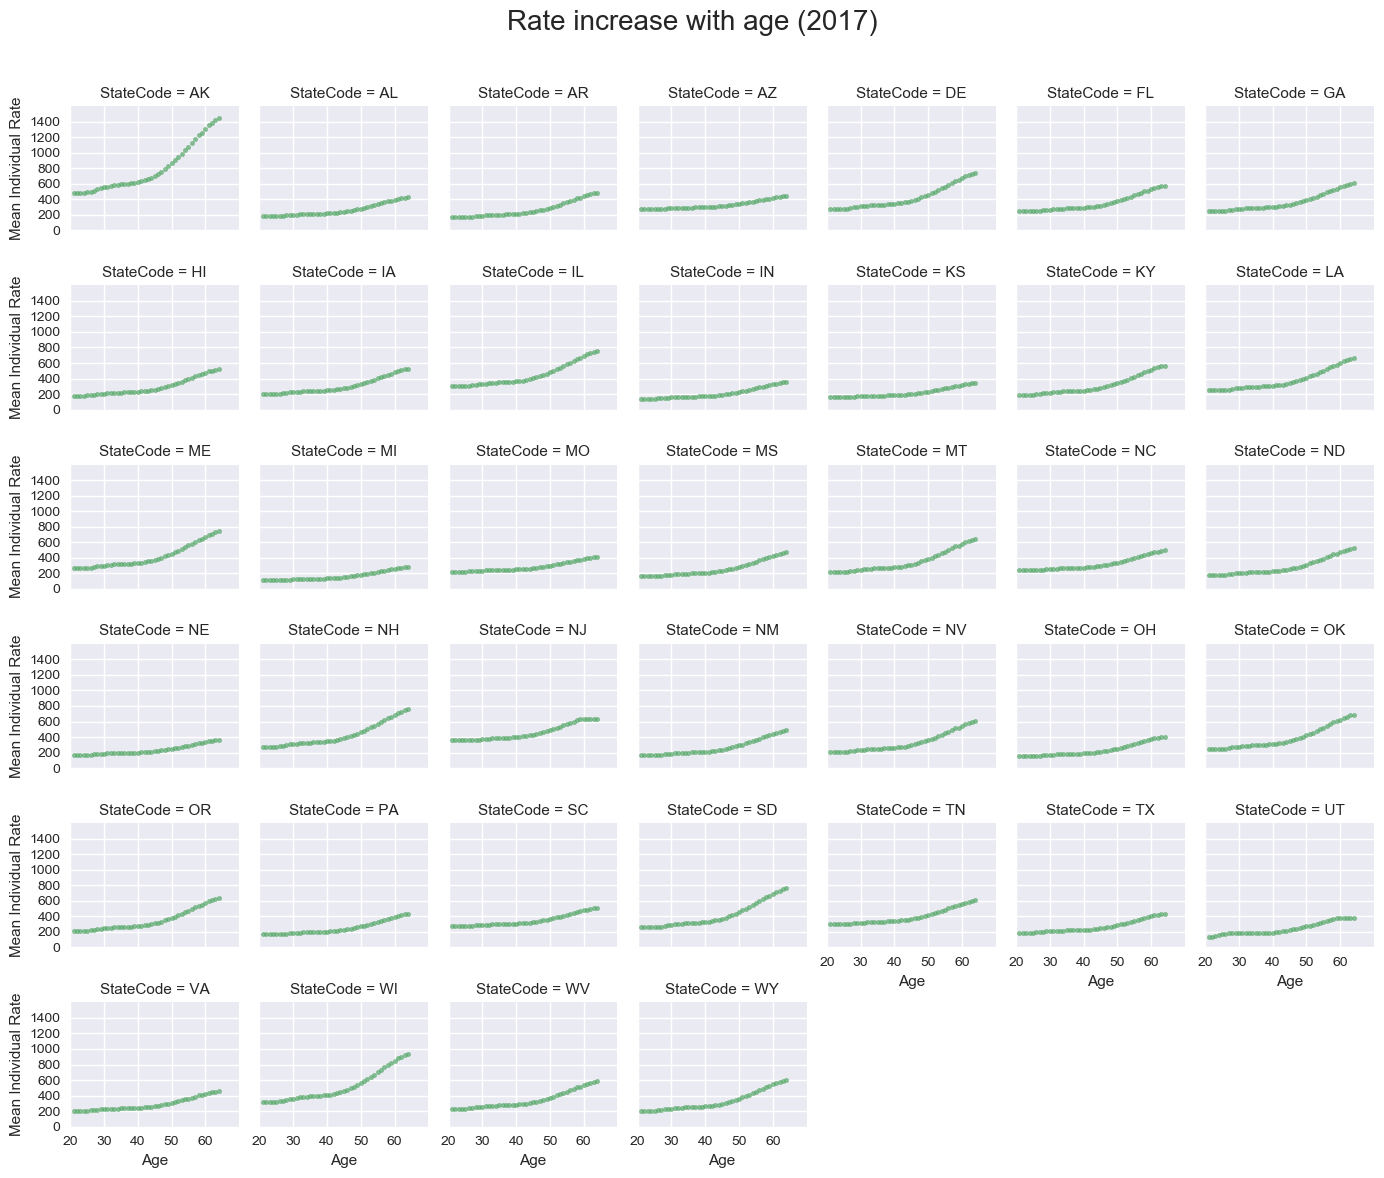

In [380]:
df_age2017=df1.groupby(['StateCode','Age'])['IndividualRate'].agg(['mean']).reset_index()
df_age2017=df_age2017.set_index('StateCode').rename(columns={'mean': 'Mean Individual Rate'}).reset_index()

sns.set(style="darkgrid")
grid = sns.FacetGrid(data=df_age2017, col='StateCode', hue='StateCode',col_wrap=7, size=2)
grid.map(plt.scatter, "Age", "Mean Individual Rate", s=10, color="C1",alpha=0.7)
grid.set(xticks=np.arange(20,70,10), yticks=np.arange(0,1600,200),
         xlim=(20, 70), ylim=(0, 1600))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Rate increase with age (2017)',fontsize=20) 
plt.show()

### Where can you smoke without a worry?

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



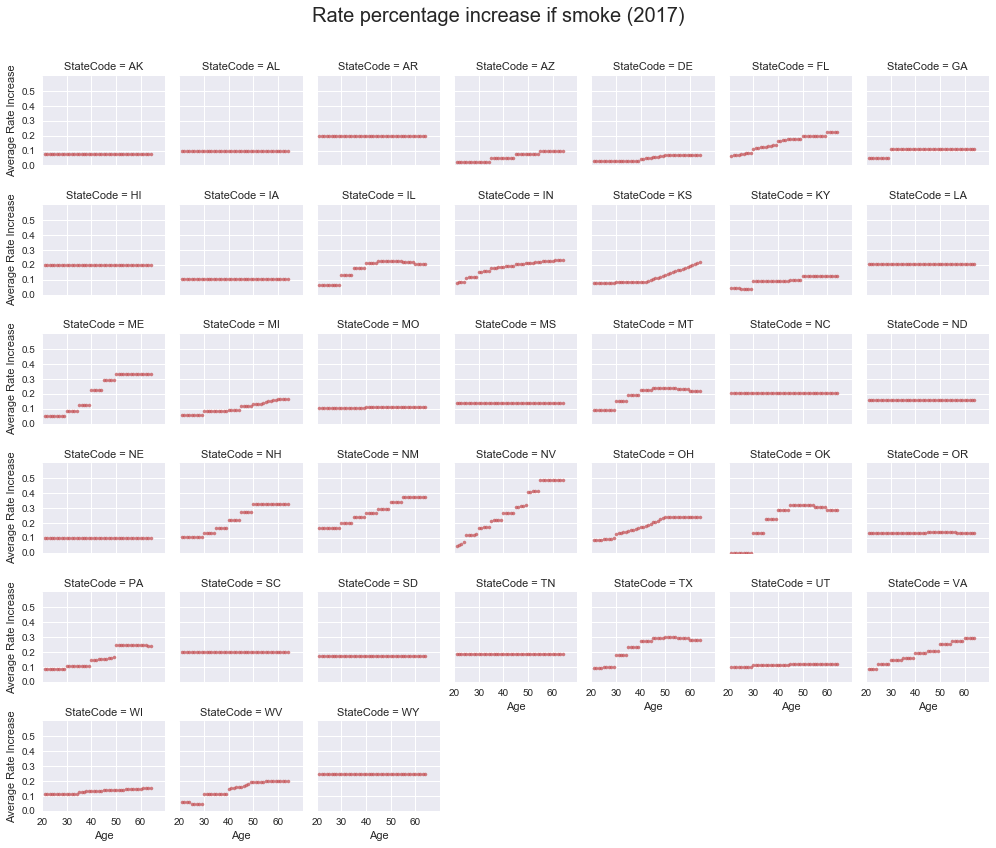

In [30]:
# whether you smoke matters somewhere
df=df1.loc[df1['Tobacco']=='Tobacco User/Non-Tobacco User']
df.loc[:,['IndividualTobaccoRate']]=df['IndividualTobaccoRate'].apply(pd.to_numeric)
df["Percentage Difference"]=(df['IndividualTobaccoRate']-df['IndividualRate'])/df['IndividualRate']
df=df.groupby(['StateCode','Age'])['Percentage Difference'].agg(['mean']).reset_index()

df=df.set_index('StateCode').rename(columns={'mean': 'Average Rate Increase'}).reset_index()

sns.set(style="darkgrid")
grid = sns.FacetGrid(data=df, col='StateCode', hue='StateCode',col_wrap=7, size=2)
grid.map(plt.scatter, "Age", "Average Rate Increase", s=10, color="C2",alpha=0.7)
grid.set(xticks=np.arange(20,70,10), yticks=np.arange(0,0.6,0.1),
         xlim=(20, 70), ylim=(0, 0.6))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Rate percentage increase if smoke (2017)',fontsize=20) 
plt.show()

### How many dependents as an individual?

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

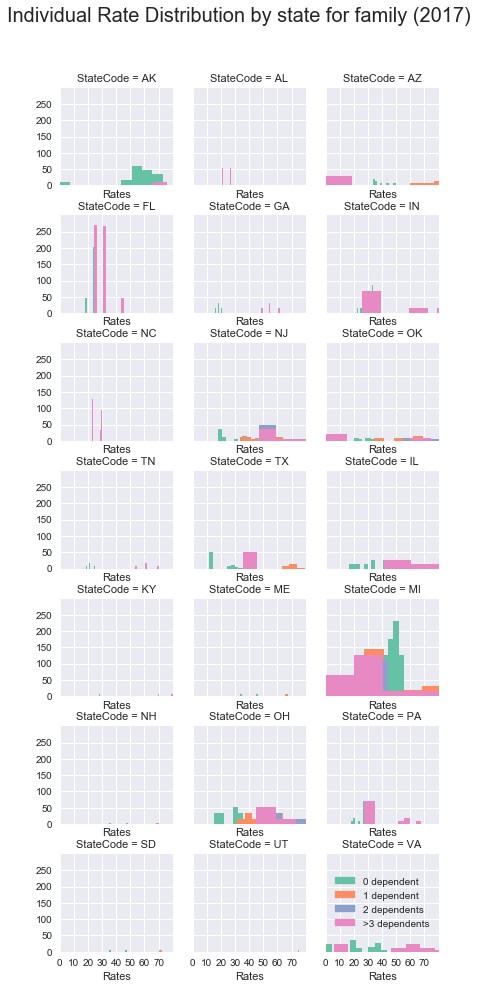

In [144]:
df4=Rate2017[['StateCode','PlanId', 'IssuerId','Age','IndividualRate','PrimarySubscriberAndOneDependent','PrimarySubscriberAndTwoDependents',
             'PrimarySubscriberAndThreeOrMoreDependents', 'Couple','CoupleAndOneDependent','CoupleAndTwoDependents',
             'CoupleAndThreeOrMoreDependents']]
df4=df4.loc[df4['Age']=='Family Option']
df=df4[['StateCode','IndividualRate','PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents']]
df['IndividualRate']=pd.to_numeric(df['IndividualRate'])
df['OneDependent']=pd.to_numeric(df['PrimarySubscriberAndOneDependent'])
df['TwoDependents']=pd.to_numeric(df['PrimarySubscriberAndTwoDependents'])
df['ThreeOrMoreDependents']=pd.to_numeric(df['PrimarySubscriberAndThreeOrMoreDependents'])

sns.set(style="darkgrid")
colors=sns.color_palette("Set2", 10)
grid = sns.FacetGrid(df, col="StateCode", hue="StateCode",col_wrap=3, size=2)
g=grid.map(plt.hist,'IndividualRate',color=colors[0])
g=grid.map(plt.hist,'OneDependent',color=colors[1])
g=grid.map(plt.hist,'TwoDependents',color=colors[2])
g=grid.map(plt.hist,'ThreeOrMoreDependents',color=colors[3])

# There is no labels, need to define the labels
legend_labels  = ['0 dependent', '1 dependent', '2 dependents', '>3 dependents']

# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for C, L in zip(colors[:4],legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches,loc='center left')

grid.set(xlabel="Rates",xticks=np.arange(0,80,10), yticks=np.arange(0,300,50),
         xlim=(0, 80), ylim=(0, 300))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Individual Rate Distribution by state with varied dependents (2017)',fontsize=20) 
plt.show()


### How many dependents as a couple?

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

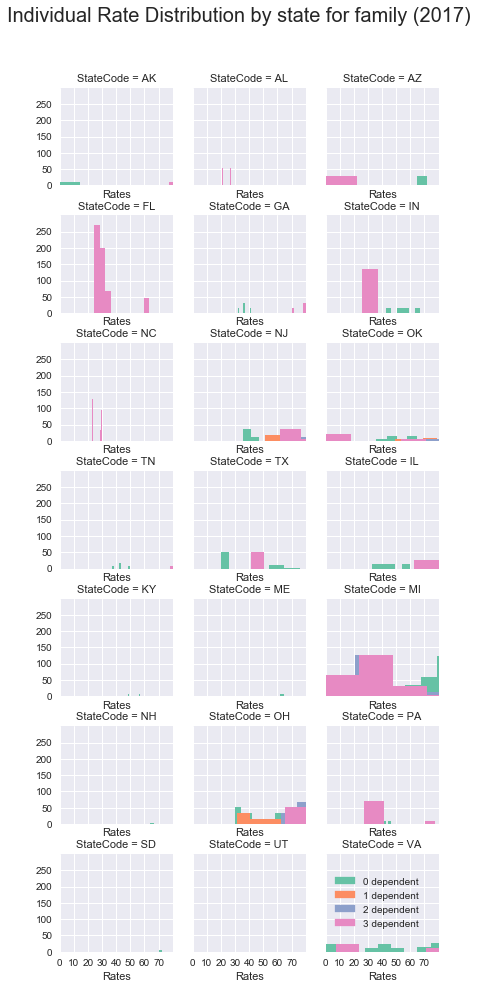

In [146]:
# Which state is the best to have kids (individual with dependent)
df=df4[['StateCode','Couple','CoupleAndOneDependent','CoupleAndTwoDependents','CoupleAndThreeOrMoreDependents']]
df['Couple']=pd.to_numeric(df['Couple'])
df['OneDependent']=pd.to_numeric(df['CoupleAndOneDependent'])
df['TwoDependents']=pd.to_numeric(df['CoupleAndTwoDependents'])
df['ThreeOrMoreDependents']=pd.to_numeric(df['CoupleAndThreeOrMoreDependents'])

sns.set(style="darkgrid")
colors=sns.color_palette("Set2", 10)
grid = sns.FacetGrid(df, col="StateCode", hue="StateCode",col_wrap=3, size=2)
g=grid.map(plt.hist,'Couple',color=colors[0])
g=grid.map(plt.hist,'OneDependent',color=colors[1])
g=grid.map(plt.hist,'TwoDependents',color=colors[2])
g=grid.map(plt.hist,'ThreeOrMoreDependents',color=colors[3])

# There is no labels, need to define the labels
legend_labels  = ['0 dependent', '1 dependent', '2 dependent', '3 dependent', '4 dependent']

# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for C, L in zip(colors[:4],legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches,loc='center left')

grid.set(xlabel="Rates",xticks=np.arange(0,80,10), yticks=np.arange(0,300,50),
         xlim=(0, 80), ylim=(0, 300))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Couple Rate Distribution by state with varied dependents (2017)',fontsize=20) 
plt.show()
